# Install des photos, executer une fois et prendre le chemin apres


In [1]:
"""
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gvclsu/water-segmentation-dataset")

print("Path to dataset files:", path)
"""

100%|██████████| 4.77G/4.77G [08:45<00:00, 9.75MB/s]

Extracting files...


Path to dataset files: C:\Users\thesy\.cache\kagglehub\datasets\gvclsu\water-segmentation-dataset\versions\4


# Import Librairies

In [2]:
import os 
import keras
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from numpy import zeros
from numpy.random import randint

# Data
from tensorflow.image import resize
from keras.preprocessing.image import load_img, img_to_array

# Data Viz
import matplotlib.pyplot as plt

# Model
from keras.layers import add
from keras.layers import Input
from keras.layers import Layer
from keras.layers import Conv2D
from keras.layers import multiply
from keras.layers import concatenate
from keras.layers import Conv2DTranspose
from keras.layers import MaxPool2D
from keras.layers import UpSampling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout

# Model Functions
from keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import Callback, ModelCheckpoint

# Load les images et les masks de tous le dossier

In [3]:
def load_image(path):
    img = resize(img_to_array(load_img(path))/255., (256,256))
    return img

In [4]:
def load_data(paths):
    images = zeros(shape=(len(paths), 256,256,3))
    masks = zeros(shape=(len(paths), 256,256,3))
    for i, path in tqdm(enumerate(paths), desc="Loading"):
        image = load_image(path)
        images[i] = image
        
        mask_path = path.replace("JPEGImages", "Annotations")
        mask = load_image(mask_path)
        masks[i] = mask
    return images, masks

In [6]:
#image_path = "C:/Users/Lucas/.cache/kagglehub/datasets/gvclsu/water-segmentation-dataset/versions/4/water_v1/water_v1/JPEGImages/ADE20K"
#image_path = 'D:/CV/4/water_v1/water_v1/JPEGImages/ADE20K'
image_path ='C:/Users/thesy/.cache/kagglehub/datasets/gvclsu/water-segmentation-dataset/versions/4/water_v1/water_v1/JPEGImages/ADE20K'
total_images = len(os.listdir(image_path))
print(f"Total Number of Images : {total_images}")

all_image_paths = sorted(glob(image_path + "/*.png"))

Total Number of Images : 1888


In [9]:
train_paths = all_image_paths[:1000]
X_train, y_train = load_data(train_paths)



val_paths = all_image_paths[1000:]
X_val, y_val = load_data(val_paths)

Loading: 0it [00:00, ?it/s]

Loading: 1000it [00:24, 40.41it/s]
Loading: 888it [00:17, 50.59it/s] 


# Pre Process Image

In [30]:
import numpy as np
def preprocess_data(image, mask):
    # Normalize images to [-1, 1]
    image = (image / 127.5) - 1
    
    # Convert mask to binary
    mask = (mask > 0.5).astype(np.float32)
    
    return image, mask

X_train_prep, y_train_prep = preprocess_data(X_train, y_train)
X_val_prep, y_val_prep = preprocess_data(X_val, y_val)

# Affichage Images

In [31]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..-0.9924490582709219].


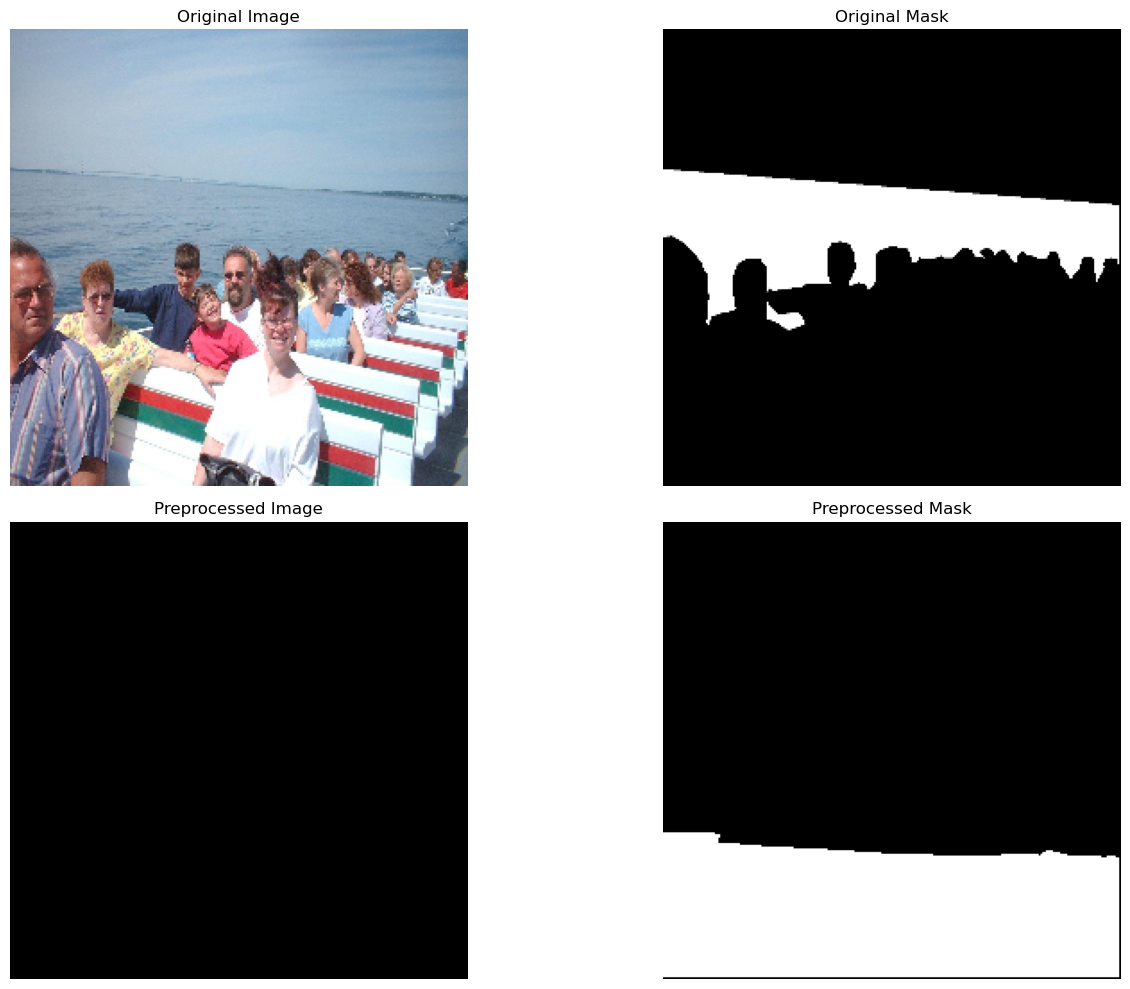

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..-0.9924490582709219].


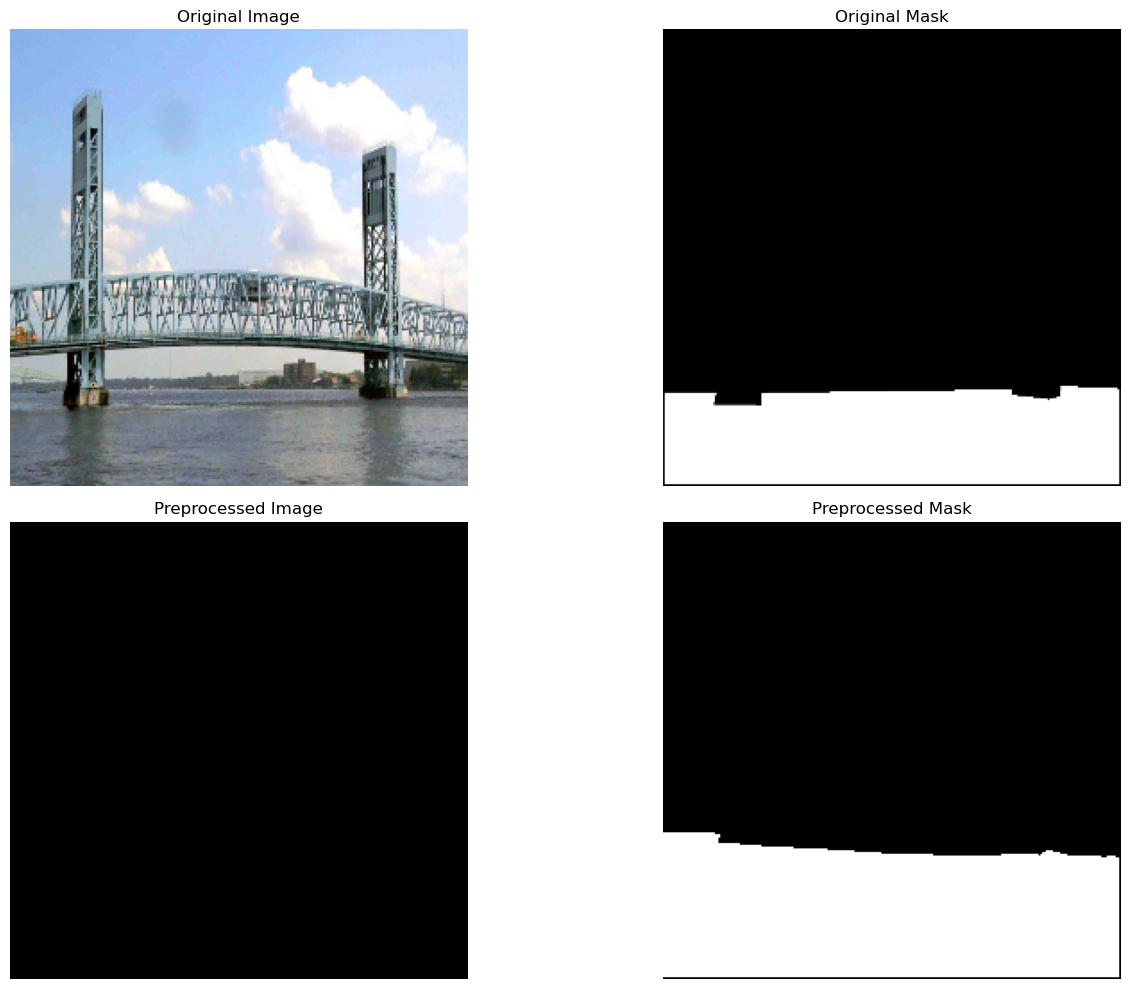

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..-0.9924490582709219].


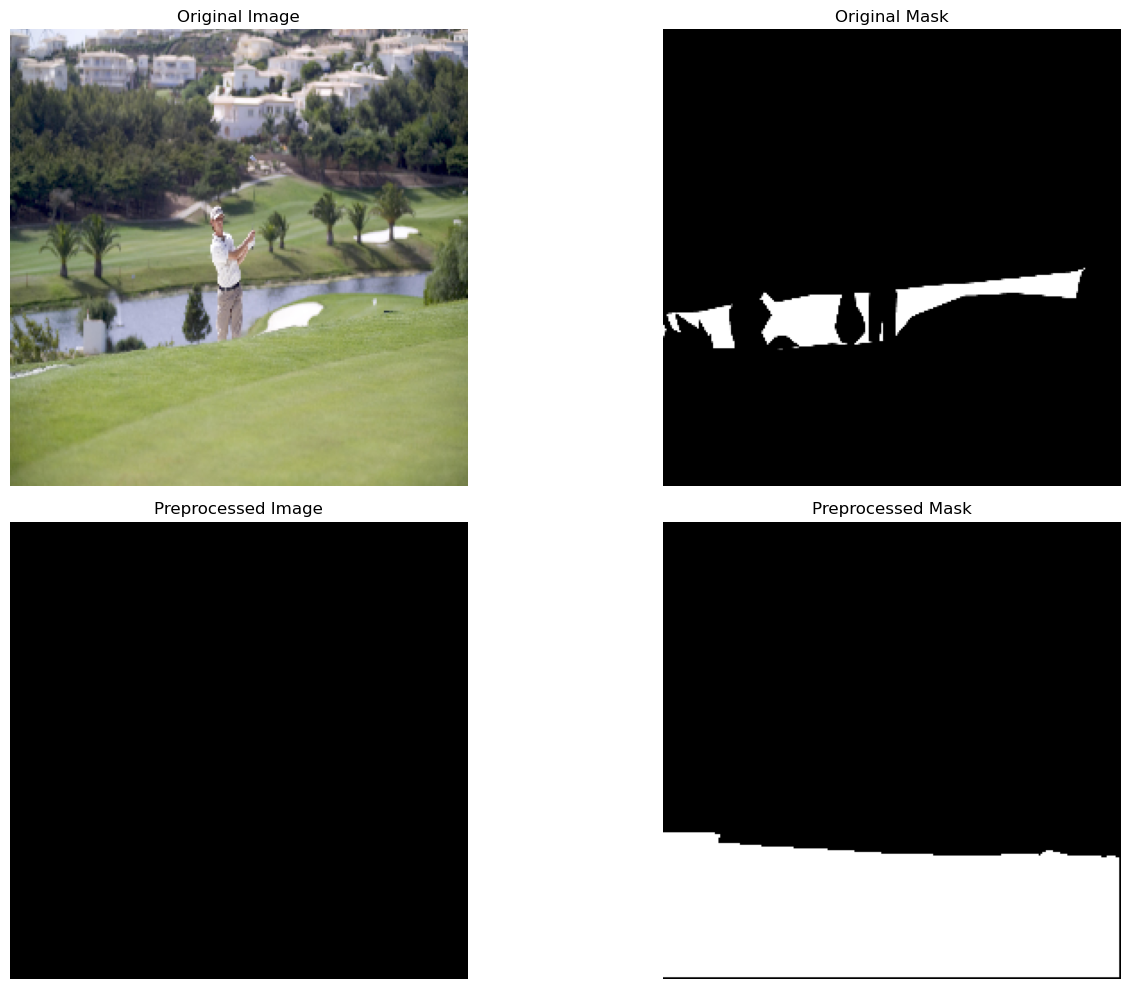

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..-0.9924490582709219].


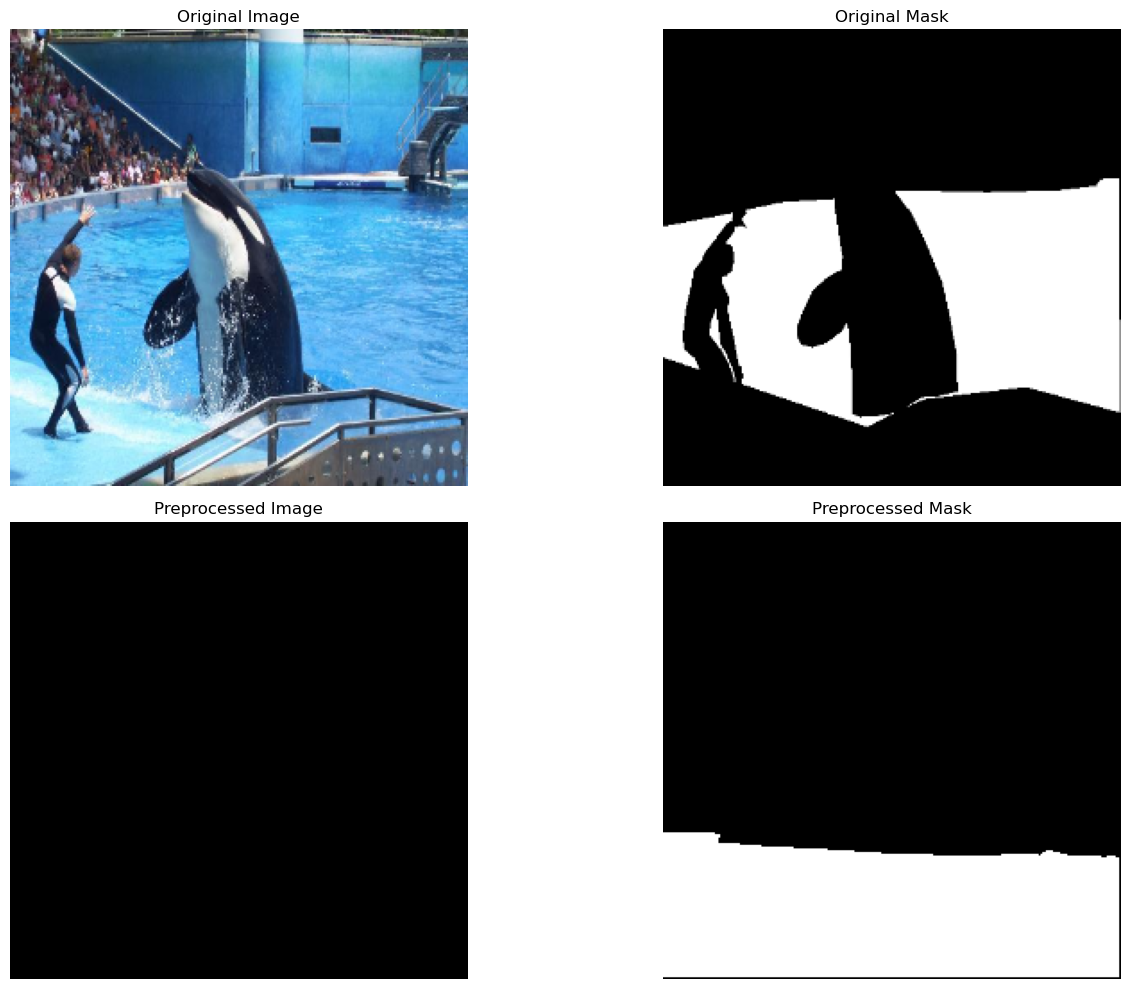

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..-0.9924490582709219].


In [33]:
for i in range(5):
    id = randint(1000)
    image, mask = X_train[id], y_train[id]
    image_prep , mask_prep = X_train_prep[id], y_train_prep[id]
    plt.figure(figsize=(15,10))
    
    # Original Image
    plt.subplot(2,2,1)
    show_image(image, title="Original Image")
    
    # Original Mask
    plt.subplot(2,2,2)
    show_image(mask, title="Original Mask")
    
    # Preprocessed Image
    plt.subplot(2,2,3)
    show_image(image_prep, title="Preprocessed Image")
    
    # Preprocessed Mask
    plt.subplot(2,2,4)
    show_image(mask_prep, title="Preprocessed Mask")
    
    plt.tight_layout()
    plt.show()

# Modele (Deja fait juste code pour comprendre 10h d'execution) dans l'autre notebook

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


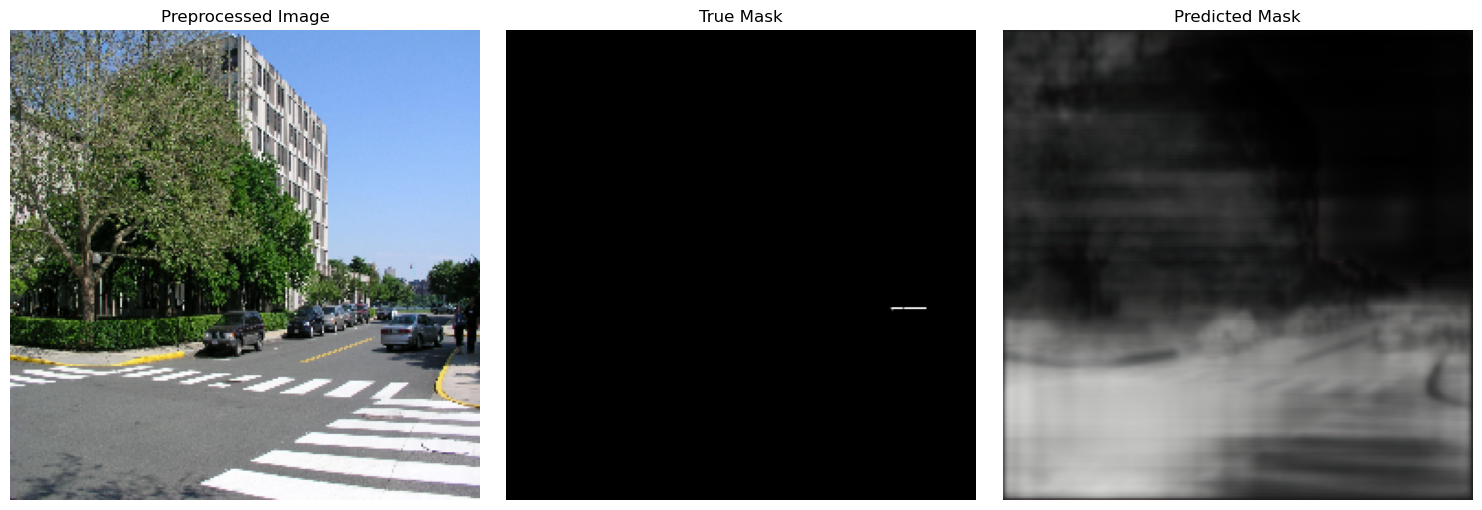

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


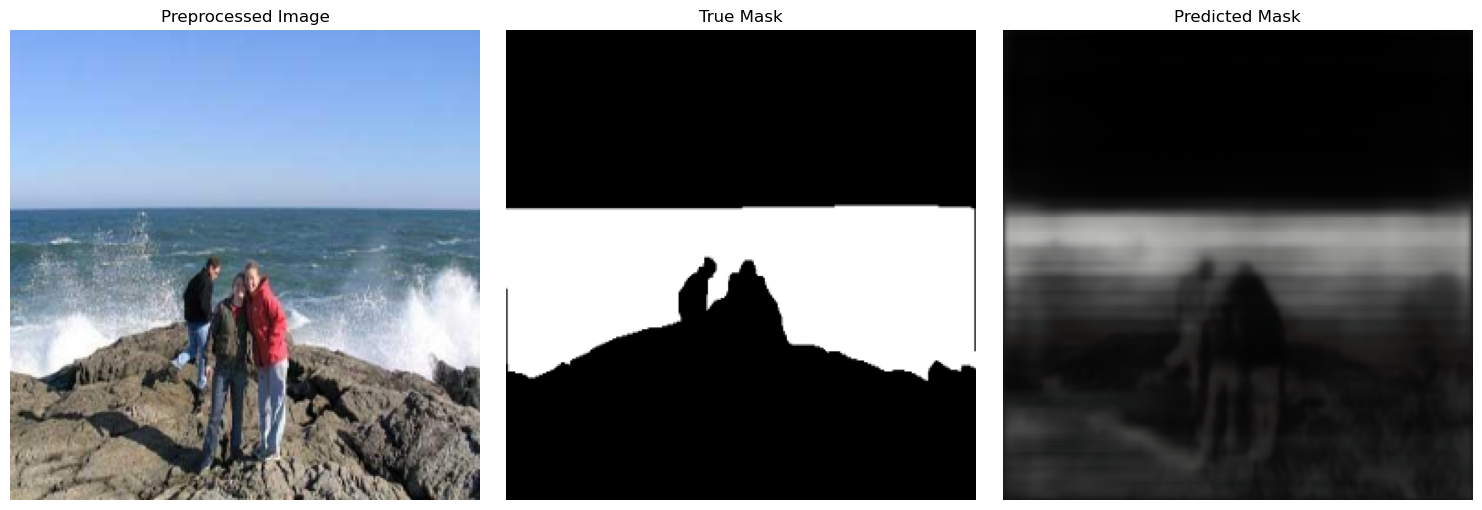

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


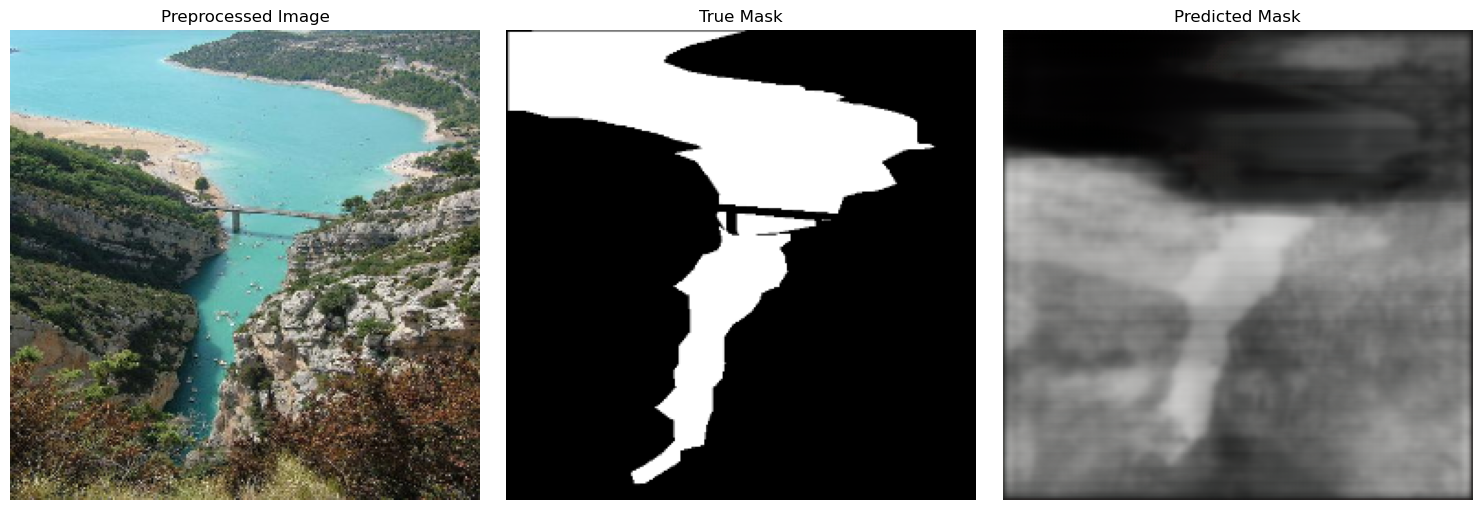

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


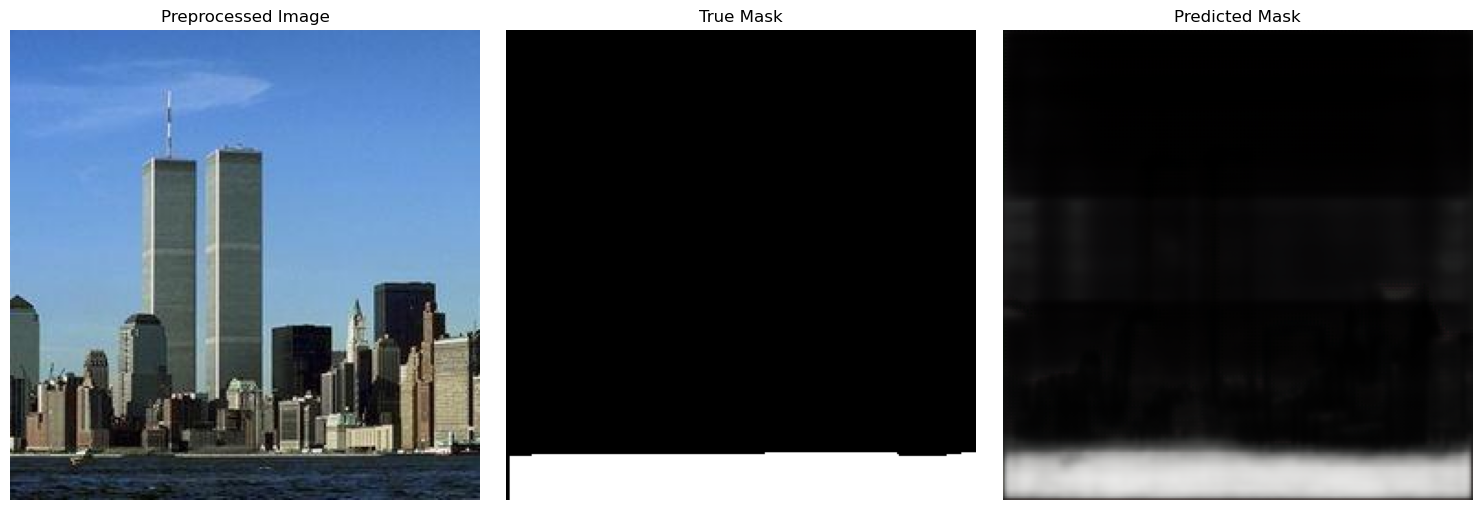

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


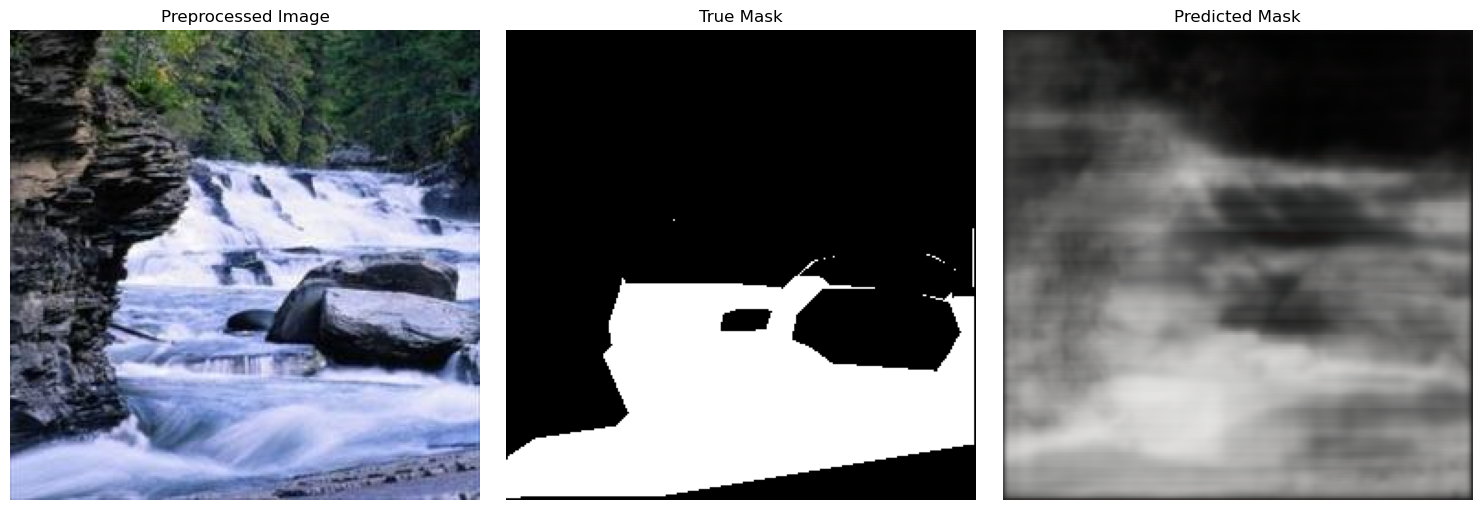

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


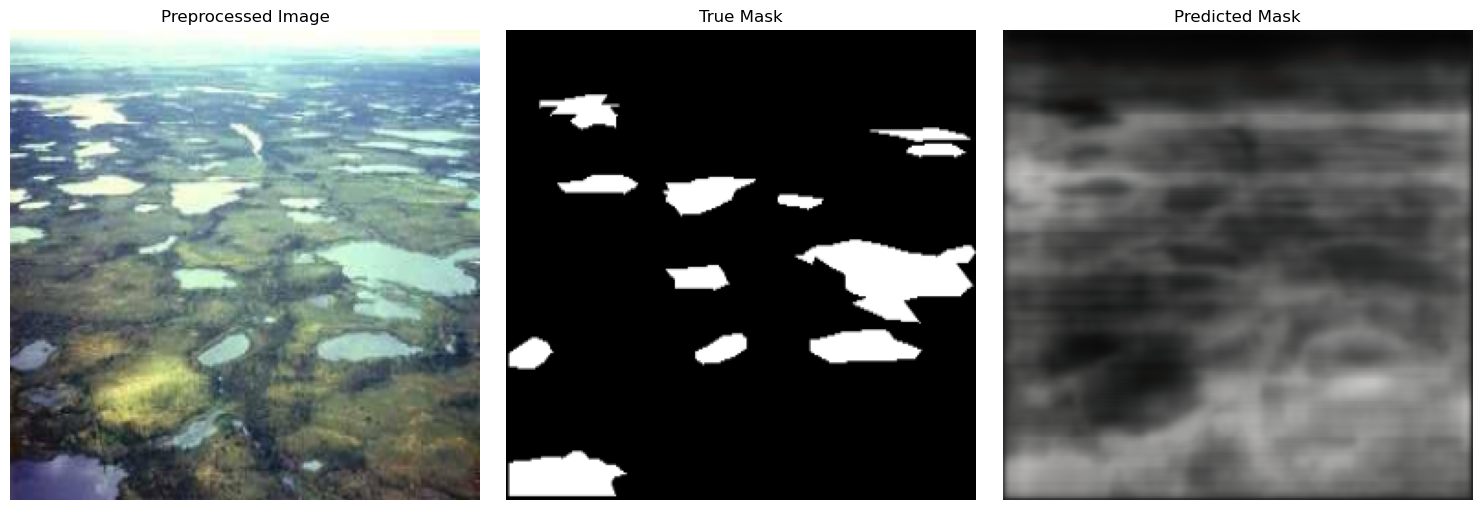

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


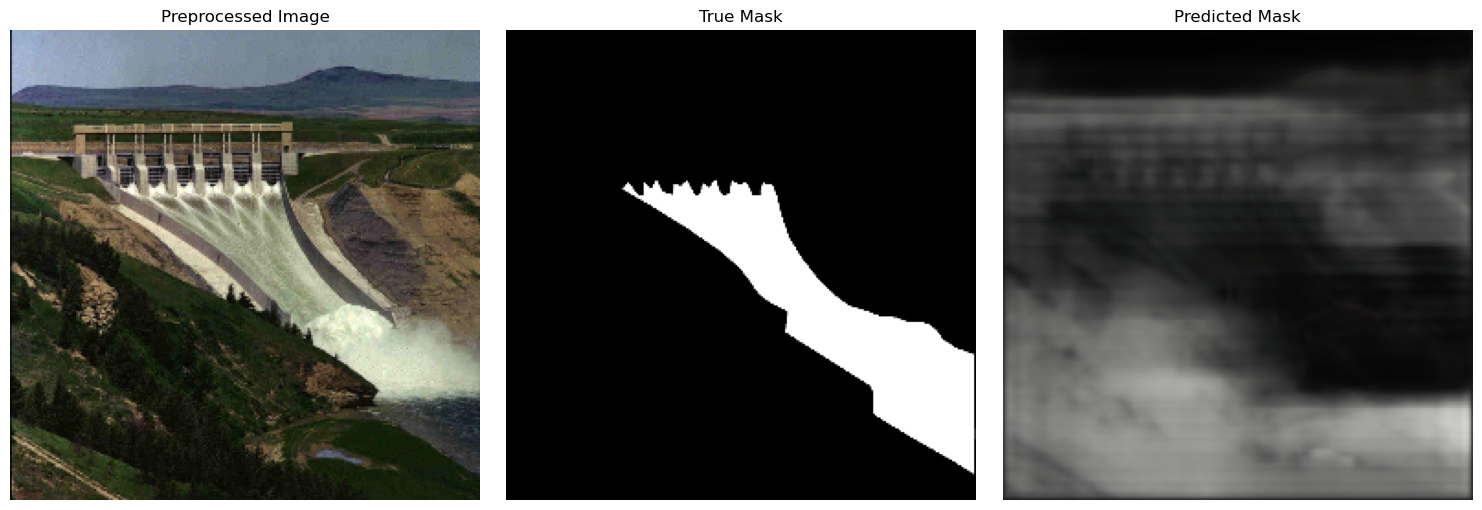

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


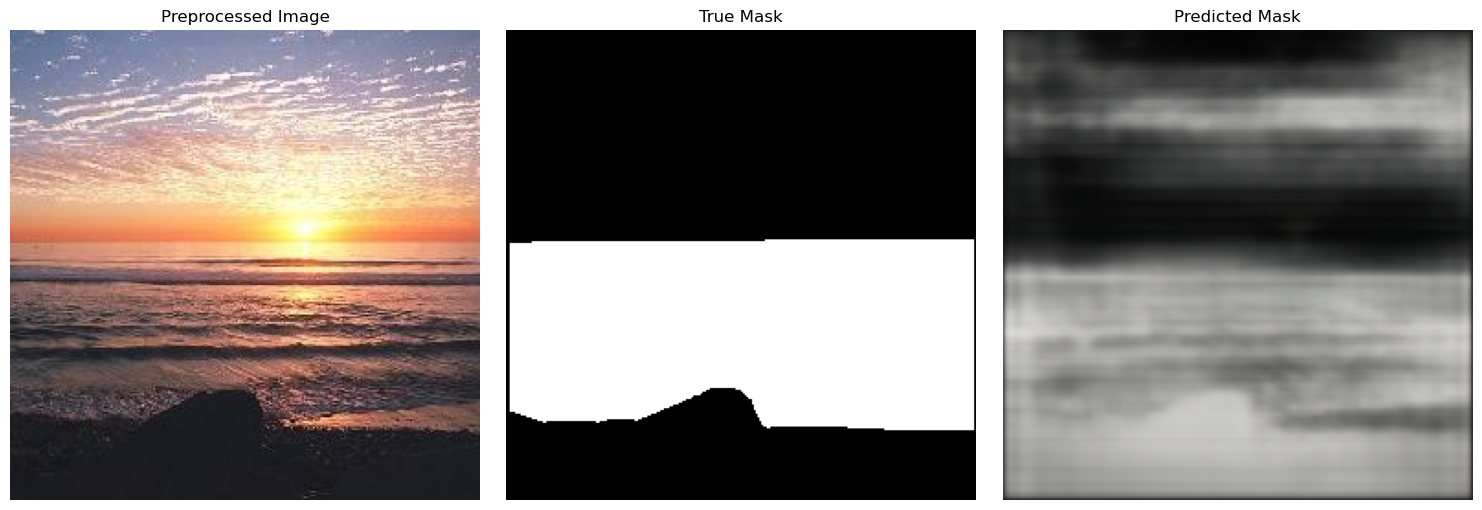

In [35]:
from tensorflow.keras.models import load_model

model = load_model('water_segmentation_unet_20241226.keras')


def show_predictions(model, X_prep, y, num_samples=10):
    for i in range(num_samples):
        idx = np.random.randint(len(X_prep))
        
        # Get prediction
        pred = model.predict(X_prep[idx:idx+1])[0]
        
        plt.figure(figsize=(20, 5))
        
        
        # Preprocessed Image
        plt.subplot(1, 4, 2)
        show_image(X_prep[idx], title='Preprocessed Image')
        
        # True Mask
        plt.subplot(1, 4, 3)
        show_image(y[idx], title='True Mask')
        
        # Predicted Mask
        plt.subplot(1, 4, 4)
        show_image(pred, title='Predicted Mask')
        
        plt.tight_layout()
        plt.show()

# Show predictions with both original and preprocessed images
show_predictions(model, X_val, y_val)